In [1]:
import numpy as np
import tensorflow as tf
import re
from collections import Counter
import json
from pprint import pprint
from tensorflow.contrib import learn
import re
import csv
import pickle

In [2]:
###############################################
#read the embedding from csv here and load it in train_embed, test_embed and val_embed
#em_train = [], em_test = [], em_val = [], train_y = [], test_y = [], val_y = []

pkl_file = open('train_x.pkl', 'rb')
train_x = pickle.load(pkl_file)

pkl_file = open('test_x.pkl', 'rb')
test_x = pickle.load(pkl_file)

pkl_file = open('val_x.pkl', 'rb')
val_x = pickle.load(pkl_file)

pkl_file = open('train_y.pkl', 'rb')
train_y = pickle.load(pkl_file)

pkl_file = open('test_y.pkl', 'rb')
test_y = pickle.load(pkl_file)

pkl_file = open('val_y.pkl', 'rb')
val_y = pickle.load(pkl_file)

In [3]:
train_x.shape

(58665, 20, 300)

In [4]:
lstm_size_list = [16,32,64]
lstm_layers_list = [1]
batch_size_list = [32,64,128]
n_epochs_list = [10,15,20]

all_hyperpara_list = []
for a in lstm_size_list:
    for b in lstm_layers_list:
        for c in batch_size_list:
            for d in n_epochs_list:
                all_hyperpara_list.append((a,b,c,d))

i=0
all_hyperpara_list = all_hyperpara_list[i:i+13]       

Epoch: 0/10 Iteration: 50 Train loss: 0.827
Epoch: 0/10 Iteration: 100 Train loss: 1.049
Epoch: 0/10 Iteration: 150 Train loss: 0.781
Epoch: 0/10 Iteration: 200 Train loss: 0.511
Epoch: 0/10 Iteration: 250 Train loss: 0.882
Epoch: 0/10 Iteration: 300 Train loss: 0.428
Epoch: 0/10 Iteration: 350 Train loss: 0.571
Epoch: 0/10 Iteration: 400 Train loss: 0.542
Epoch: 0/10 Iteration: 450 Train loss: 0.352
Epoch: 0/10 Iteration: 500 Train loss: 0.705
Val acc: 0.65231
Train accuracy: 0.61145
Test accuracy: 0.65047
Epoch: 0/10 Iteration: 550 Train loss: 0.304
Epoch: 0/10 Iteration: 600 Train loss: 0.437
Epoch: 0/10 Iteration: 650 Train loss: 0.466
Epoch: 0/10 Iteration: 700 Train loss: 0.350
Epoch: 0/10 Iteration: 750 Train loss: 0.359
Epoch: 0/10 Iteration: 800 Train loss: 0.515
Epoch: 0/10 Iteration: 850 Train loss: 0.294
Epoch: 0/10 Iteration: 900 Train loss: 0.613
Epoch: 0/10 Iteration: 950 Train loss: 0.498
Epoch: 0/10 Iteration: 1000 Train loss: 0.535
Val acc: 0.43842
Train accuracy: 0.6

Epoch: 4/10 Iteration: 1000 Train loss: 0.355
Val acc: 0.84022
Train accuracy: 0.83332
Test accuracy: 0.83899
Epoch: 4/10 Iteration: 1050 Train loss: 0.549
Epoch: 4/10 Iteration: 1100 Train loss: 0.156
Epoch: 4/10 Iteration: 1150 Train loss: 0.280
Epoch: 4/10 Iteration: 1200 Train loss: 0.259
Epoch: 4/10 Iteration: 1250 Train loss: 0.013
Epoch: 4/10 Iteration: 1300 Train loss: 0.275
Epoch: 4/10 Iteration: 1350 Train loss: 0.180
Epoch: 4/10 Iteration: 1400 Train loss: 0.177
Epoch: 4/10 Iteration: 1450 Train loss: 0.260
Epoch: 4/10 Iteration: 1500 Train loss: 0.370
Val acc: 0.85643
Train accuracy: 0.82825
Test accuracy: 0.85260
Epoch: 4/10 Iteration: 1550 Train loss: 0.202
Epoch: 4/10 Iteration: 1600 Train loss: 0.166
Epoch: 4/10 Iteration: 1650 Train loss: 0.109
Epoch: 4/10 Iteration: 1700 Train loss: 0.429
Epoch: 4/10 Iteration: 1750 Train loss: 0.054
Epoch: 4/10 Iteration: 1800 Train loss: 0.264
Epoch: 5/10 Iteration: 50 Train loss: 0.654
Epoch: 5/10 Iteration: 100 Train loss: 1.100
E

Epoch: 9/10 Iteration: 50 Train loss: 0.650
Epoch: 9/10 Iteration: 100 Train loss: 1.180
Epoch: 9/10 Iteration: 150 Train loss: 0.929
Epoch: 9/10 Iteration: 200 Train loss: 0.563
Epoch: 9/10 Iteration: 250 Train loss: 0.767
Epoch: 9/10 Iteration: 300 Train loss: 0.432
Epoch: 9/10 Iteration: 350 Train loss: 0.529
Epoch: 9/10 Iteration: 400 Train loss: 0.335
Epoch: 9/10 Iteration: 450 Train loss: 0.070
Epoch: 9/10 Iteration: 500 Train loss: 0.557
Val acc: 0.84390
Train accuracy: 0.83838
Test accuracy: 0.84370
Epoch: 9/10 Iteration: 550 Train loss: 0.138
Epoch: 9/10 Iteration: 600 Train loss: 0.119
Epoch: 9/10 Iteration: 650 Train loss: 0.151
Epoch: 9/10 Iteration: 700 Train loss: 0.067
Epoch: 9/10 Iteration: 750 Train loss: 0.172
Epoch: 9/10 Iteration: 800 Train loss: 0.136
Epoch: 9/10 Iteration: 850 Train loss: 0.041
Epoch: 9/10 Iteration: 900 Train loss: 0.481
Epoch: 9/10 Iteration: 950 Train loss: 0.416
Epoch: 9/10 Iteration: 1000 Train loss: 0.363
Val acc: 0.85117
Train accuracy: 0.8

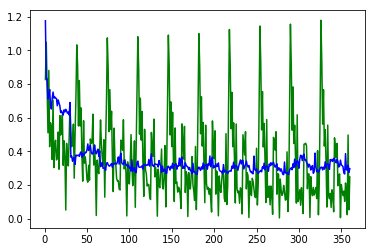

Epoch: 0/15 Iteration: 50 Train loss: 0.792
Epoch: 0/15 Iteration: 100 Train loss: 1.045
Epoch: 0/15 Iteration: 150 Train loss: 0.844
Epoch: 0/15 Iteration: 200 Train loss: 0.550
Epoch: 0/15 Iteration: 250 Train loss: 0.842
Epoch: 0/15 Iteration: 300 Train loss: 0.451
Epoch: 0/15 Iteration: 350 Train loss: 0.538
Epoch: 0/15 Iteration: 400 Train loss: 0.476
Epoch: 0/15 Iteration: 450 Train loss: 0.326
Epoch: 0/15 Iteration: 500 Train loss: 0.703
Val acc: 0.63876
Train accuracy: 0.61402
Test accuracy: 0.63293
Epoch: 0/15 Iteration: 550 Train loss: 0.317
Epoch: 0/15 Iteration: 600 Train loss: 0.448
Epoch: 0/15 Iteration: 650 Train loss: 0.493
Epoch: 0/15 Iteration: 700 Train loss: 0.379
Epoch: 0/15 Iteration: 750 Train loss: 0.276
Epoch: 0/15 Iteration: 800 Train loss: 0.399
Epoch: 0/15 Iteration: 850 Train loss: 0.202
Epoch: 0/15 Iteration: 900 Train loss: 0.603
Epoch: 0/15 Iteration: 950 Train loss: 0.532
Epoch: 0/15 Iteration: 1000 Train loss: 0.508
Val acc: 0.51657
Train accuracy: 0.6

Epoch: 4/15 Iteration: 1000 Train loss: 0.369
Val acc: 0.78253
Train accuracy: 0.81983
Test accuracy: 0.78135
Epoch: 4/15 Iteration: 1050 Train loss: 0.528
Epoch: 4/15 Iteration: 1100 Train loss: 0.258
Epoch: 4/15 Iteration: 1150 Train loss: 0.238
Epoch: 4/15 Iteration: 1200 Train loss: 0.224
Epoch: 4/15 Iteration: 1250 Train loss: 0.004
Epoch: 4/15 Iteration: 1300 Train loss: 0.178
Epoch: 4/15 Iteration: 1350 Train loss: 0.228
Epoch: 4/15 Iteration: 1400 Train loss: 0.178
Epoch: 4/15 Iteration: 1450 Train loss: 0.394
Epoch: 4/15 Iteration: 1500 Train loss: 0.407
Val acc: 0.85434
Train accuracy: 0.83828
Test accuracy: 0.85331
Epoch: 4/15 Iteration: 1550 Train loss: 0.331
Epoch: 4/15 Iteration: 1600 Train loss: 0.113
Epoch: 4/15 Iteration: 1650 Train loss: 0.181
Epoch: 4/15 Iteration: 1700 Train loss: 0.447
Epoch: 4/15 Iteration: 1750 Train loss: 0.046
Epoch: 4/15 Iteration: 1800 Train loss: 0.388
Epoch: 5/15 Iteration: 50 Train loss: 0.664
Epoch: 5/15 Iteration: 100 Train loss: 1.075
E

Epoch: 9/15 Iteration: 50 Train loss: 0.666
Epoch: 9/15 Iteration: 100 Train loss: 1.115
Epoch: 9/15 Iteration: 150 Train loss: 0.793
Epoch: 9/15 Iteration: 200 Train loss: 0.530
Epoch: 9/15 Iteration: 250 Train loss: 0.723
Epoch: 9/15 Iteration: 300 Train loss: 0.283
Epoch: 9/15 Iteration: 350 Train loss: 0.557
Epoch: 9/15 Iteration: 400 Train loss: 0.308
Epoch: 9/15 Iteration: 450 Train loss: 0.109
Epoch: 9/15 Iteration: 500 Train loss: 0.487
Val acc: 0.86498
Train accuracy: 0.84834
Test accuracy: 0.86349
Epoch: 9/15 Iteration: 550 Train loss: 0.137
Epoch: 9/15 Iteration: 600 Train loss: 0.171
Epoch: 9/15 Iteration: 650 Train loss: 0.088
Epoch: 9/15 Iteration: 700 Train loss: 0.142
Epoch: 9/15 Iteration: 750 Train loss: 0.124
Epoch: 9/15 Iteration: 800 Train loss: 0.160
Epoch: 9/15 Iteration: 850 Train loss: 0.038
Epoch: 9/15 Iteration: 900 Train loss: 0.246
Epoch: 9/15 Iteration: 950 Train loss: 0.303
Epoch: 9/15 Iteration: 1000 Train loss: 0.333
Val acc: 0.85991
Train accuracy: 0.8

Epoch: 13/15 Iteration: 850 Train loss: 0.044
Epoch: 13/15 Iteration: 900 Train loss: 0.279
Epoch: 13/15 Iteration: 950 Train loss: 0.328
Epoch: 13/15 Iteration: 1000 Train loss: 0.300
Val acc: 0.87730
Train accuracy: 0.88499
Test accuracy: 0.87520
Epoch: 13/15 Iteration: 1050 Train loss: 0.369
Epoch: 13/15 Iteration: 1100 Train loss: 0.183
Epoch: 13/15 Iteration: 1150 Train loss: 0.138
Epoch: 13/15 Iteration: 1200 Train loss: 0.141
Epoch: 13/15 Iteration: 1250 Train loss: 0.002
Epoch: 13/15 Iteration: 1300 Train loss: 0.127
Epoch: 13/15 Iteration: 1350 Train loss: 0.131
Epoch: 13/15 Iteration: 1400 Train loss: 0.143
Epoch: 13/15 Iteration: 1450 Train loss: 0.167
Epoch: 13/15 Iteration: 1500 Train loss: 0.021
Val acc: 0.87495
Train accuracy: 0.88814
Test accuracy: 0.87653
Epoch: 13/15 Iteration: 1550 Train loss: 0.197
Epoch: 13/15 Iteration: 1600 Train loss: 0.039
Epoch: 13/15 Iteration: 1650 Train loss: 0.160
Epoch: 13/15 Iteration: 1700 Train loss: 0.291
Epoch: 13/15 Iteration: 1750 

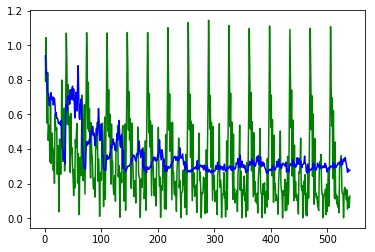

Epoch: 0/20 Iteration: 50 Train loss: 0.781
Epoch: 0/20 Iteration: 100 Train loss: 1.046
Epoch: 0/20 Iteration: 150 Train loss: 0.781
Epoch: 0/20 Iteration: 200 Train loss: 0.529
Epoch: 0/20 Iteration: 250 Train loss: 0.825
Epoch: 0/20 Iteration: 300 Train loss: 0.470
Epoch: 0/20 Iteration: 350 Train loss: 0.550
Epoch: 0/20 Iteration: 400 Train loss: 0.548
Epoch: 0/20 Iteration: 450 Train loss: 0.289
Epoch: 0/20 Iteration: 500 Train loss: 0.657
Val acc: 0.66566
Train accuracy: 0.61434
Test accuracy: 0.66336
Epoch: 0/20 Iteration: 550 Train loss: 0.376
Epoch: 0/20 Iteration: 600 Train loss: 0.506
Epoch: 0/20 Iteration: 650 Train loss: 0.516
Epoch: 0/20 Iteration: 700 Train loss: 0.383
Epoch: 0/20 Iteration: 750 Train loss: 0.325
Epoch: 0/20 Iteration: 800 Train loss: 0.427
Epoch: 0/20 Iteration: 850 Train loss: 0.202
Epoch: 0/20 Iteration: 900 Train loss: 0.587
Epoch: 0/20 Iteration: 950 Train loss: 0.454
Epoch: 0/20 Iteration: 1000 Train loss: 0.498
Val acc: 0.68719
Train accuracy: 0.7

Epoch: 4/20 Iteration: 1000 Train loss: 0.392
Val acc: 0.82191
Train accuracy: 0.82909
Test accuracy: 0.82529
Epoch: 4/20 Iteration: 1050 Train loss: 0.554
Epoch: 4/20 Iteration: 1100 Train loss: 0.160
Epoch: 4/20 Iteration: 1150 Train loss: 0.327
Epoch: 4/20 Iteration: 1200 Train loss: 0.146
Epoch: 4/20 Iteration: 1250 Train loss: 0.003
Epoch: 4/20 Iteration: 1300 Train loss: 0.276
Epoch: 4/20 Iteration: 1350 Train loss: 0.199
Epoch: 4/20 Iteration: 1400 Train loss: 0.203
Epoch: 4/20 Iteration: 1450 Train loss: 0.189
Epoch: 4/20 Iteration: 1500 Train loss: 0.435
Val acc: 0.86508
Train accuracy: 0.84012
Test accuracy: 0.86047
Epoch: 4/20 Iteration: 1550 Train loss: 0.409
Epoch: 4/20 Iteration: 1600 Train loss: 0.067
Epoch: 4/20 Iteration: 1650 Train loss: 0.212
Epoch: 4/20 Iteration: 1700 Train loss: 0.523
Epoch: 4/20 Iteration: 1750 Train loss: 0.044
Epoch: 4/20 Iteration: 1800 Train loss: 0.213
Epoch: 5/20 Iteration: 50 Train loss: 0.663
Epoch: 5/20 Iteration: 100 Train loss: 1.089
E

Epoch: 9/20 Iteration: 50 Train loss: 0.621
Epoch: 9/20 Iteration: 100 Train loss: 1.162
Epoch: 9/20 Iteration: 150 Train loss: 0.813
Epoch: 9/20 Iteration: 200 Train loss: 0.485
Epoch: 9/20 Iteration: 250 Train loss: 0.673
Epoch: 9/20 Iteration: 300 Train loss: 0.313
Epoch: 9/20 Iteration: 350 Train loss: 0.517
Epoch: 9/20 Iteration: 400 Train loss: 0.304
Epoch: 9/20 Iteration: 450 Train loss: 0.084
Epoch: 9/20 Iteration: 500 Train loss: 0.406
Val acc: 0.81905
Train accuracy: 0.82321
Test accuracy: 0.81920
Epoch: 9/20 Iteration: 550 Train loss: 0.204
Epoch: 9/20 Iteration: 600 Train loss: 0.171
Epoch: 9/20 Iteration: 650 Train loss: 0.224
Epoch: 9/20 Iteration: 700 Train loss: 0.104
Epoch: 9/20 Iteration: 750 Train loss: 0.083
Epoch: 9/20 Iteration: 800 Train loss: 0.307
Epoch: 9/20 Iteration: 850 Train loss: 0.076
Epoch: 9/20 Iteration: 900 Train loss: 0.289
Epoch: 9/20 Iteration: 950 Train loss: 0.344
Epoch: 9/20 Iteration: 1000 Train loss: 0.189
Val acc: 0.85485
Train accuracy: 0.8

Epoch: 13/20 Iteration: 850 Train loss: 0.142
Epoch: 13/20 Iteration: 900 Train loss: 0.251
Epoch: 13/20 Iteration: 950 Train loss: 0.355
Epoch: 13/20 Iteration: 1000 Train loss: 0.210
Val acc: 0.88661
Train accuracy: 0.88359
Test accuracy: 0.88421
Epoch: 13/20 Iteration: 1050 Train loss: 0.407
Epoch: 13/20 Iteration: 1100 Train loss: 0.262
Epoch: 13/20 Iteration: 1150 Train loss: 0.196
Epoch: 13/20 Iteration: 1200 Train loss: 0.141
Epoch: 13/20 Iteration: 1250 Train loss: 0.002
Epoch: 13/20 Iteration: 1300 Train loss: 0.256
Epoch: 13/20 Iteration: 1350 Train loss: 0.132
Epoch: 13/20 Iteration: 1400 Train loss: 0.125
Epoch: 13/20 Iteration: 1450 Train loss: 0.224
Epoch: 13/20 Iteration: 1500 Train loss: 0.048
Val acc: 0.89218
Train accuracy: 0.89142
Test accuracy: 0.89321
Epoch: 13/20 Iteration: 1550 Train loss: 0.140
Epoch: 13/20 Iteration: 1600 Train loss: 0.128
Epoch: 13/20 Iteration: 1650 Train loss: 0.081
Epoch: 13/20 Iteration: 1700 Train loss: 0.344
Epoch: 13/20 Iteration: 1750 

Test accuracy: 0.89796
Epoch: 17/20 Iteration: 1550 Train loss: 0.136
Epoch: 17/20 Iteration: 1600 Train loss: 0.085
Epoch: 17/20 Iteration: 1650 Train loss: 0.002
Epoch: 17/20 Iteration: 1700 Train loss: 0.373
Epoch: 17/20 Iteration: 1750 Train loss: 0.009
Epoch: 17/20 Iteration: 1800 Train loss: 0.127
Epoch: 18/20 Iteration: 50 Train loss: 0.557
Epoch: 18/20 Iteration: 100 Train loss: 1.181
Epoch: 18/20 Iteration: 150 Train loss: 0.760
Epoch: 18/20 Iteration: 200 Train loss: 0.425
Epoch: 18/20 Iteration: 250 Train loss: 0.619
Epoch: 18/20 Iteration: 300 Train loss: 0.204
Epoch: 18/20 Iteration: 350 Train loss: 0.419
Epoch: 18/20 Iteration: 400 Train loss: 0.244
Epoch: 18/20 Iteration: 450 Train loss: 0.066
Epoch: 18/20 Iteration: 500 Train loss: 0.322
Val acc: 0.88119
Train accuracy: 0.87693
Test accuracy: 0.88042
Epoch: 18/20 Iteration: 550 Train loss: 0.189
Epoch: 18/20 Iteration: 600 Train loss: 0.141
Epoch: 18/20 Iteration: 650 Train loss: 0.218
Epoch: 18/20 Iteration: 700 Train 

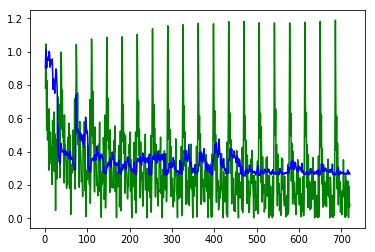

Epoch: 0/10 Iteration: 50 Train loss: 0.910
Epoch: 0/10 Iteration: 100 Train loss: 0.879
Epoch: 0/10 Iteration: 150 Train loss: 0.595
Epoch: 0/10 Iteration: 200 Train loss: 0.552
Epoch: 0/10 Iteration: 250 Train loss: 0.648
Epoch: 0/10 Iteration: 300 Train loss: 0.463
Epoch: 0/10 Iteration: 350 Train loss: 0.458
Epoch: 0/10 Iteration: 400 Train loss: 0.446
Epoch: 0/10 Iteration: 450 Train loss: 0.483
Epoch: 0/10 Iteration: 500 Train loss: 0.398
Val acc: 0.68473
Train accuracy: 0.71271
Test accuracy: 0.68591
Epoch: 0/10 Iteration: 550 Train loss: 0.331
Epoch: 0/10 Iteration: 600 Train loss: 0.413
Epoch: 0/10 Iteration: 650 Train loss: 0.273
Epoch: 0/10 Iteration: 700 Train loss: 0.325
Epoch: 0/10 Iteration: 750 Train loss: 0.713
Epoch: 0/10 Iteration: 800 Train loss: 0.275
Epoch: 0/10 Iteration: 850 Train loss: 0.595
Epoch: 0/10 Iteration: 900 Train loss: 0.597
Epoch: 1/10 Iteration: 50 Train loss: 0.897
Epoch: 1/10 Iteration: 100 Train loss: 0.826
Epoch: 1/10 Iteration: 150 Train loss:

Epoch: 9/10 Iteration: 450 Train loss: 0.305
Epoch: 9/10 Iteration: 500 Train loss: 0.187
Val acc: 0.83391
Train accuracy: 0.84339
Test accuracy: 0.82807
Epoch: 9/10 Iteration: 550 Train loss: 0.235
Epoch: 9/10 Iteration: 600 Train loss: 0.203
Epoch: 9/10 Iteration: 650 Train loss: 0.068
Epoch: 9/10 Iteration: 700 Train loss: 0.097
Epoch: 9/10 Iteration: 750 Train loss: 0.352
Epoch: 9/10 Iteration: 800 Train loss: 0.047
Epoch: 9/10 Iteration: 850 Train loss: 0.376
Epoch: 9/10 Iteration: 900 Train loss: 0.327
Training Completed
Test accuracy: 0.88437


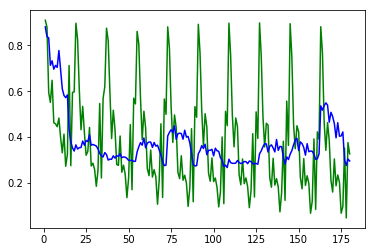

Epoch: 0/15 Iteration: 50 Train loss: 0.908
Epoch: 0/15 Iteration: 100 Train loss: 0.892
Epoch: 0/15 Iteration: 150 Train loss: 0.614
Epoch: 0/15 Iteration: 200 Train loss: 0.575
Epoch: 0/15 Iteration: 250 Train loss: 0.670
Epoch: 0/15 Iteration: 300 Train loss: 0.481
Epoch: 0/15 Iteration: 350 Train loss: 0.512
Epoch: 0/15 Iteration: 400 Train loss: 0.385
Epoch: 0/15 Iteration: 450 Train loss: 0.543
Epoch: 0/15 Iteration: 500 Train loss: 0.471
Val acc: 0.68166
Train accuracy: 0.72503
Test accuracy: 0.68140
Epoch: 0/15 Iteration: 550 Train loss: 0.305
Epoch: 0/15 Iteration: 600 Train loss: 0.419
Epoch: 0/15 Iteration: 650 Train loss: 0.298
Epoch: 0/15 Iteration: 700 Train loss: 0.382
Epoch: 0/15 Iteration: 750 Train loss: 0.747
Epoch: 0/15 Iteration: 800 Train loss: 0.306
Epoch: 0/15 Iteration: 850 Train loss: 0.454
Epoch: 0/15 Iteration: 900 Train loss: 0.611
Epoch: 1/15 Iteration: 50 Train loss: 0.891
Epoch: 1/15 Iteration: 100 Train loss: 0.834
Epoch: 1/15 Iteration: 150 Train loss:

Epoch: 9/15 Iteration: 450 Train loss: 0.357
Epoch: 9/15 Iteration: 500 Train loss: 0.193
Val acc: 0.85584
Train accuracy: 0.85369
Test accuracy: 0.85113
Epoch: 9/15 Iteration: 550 Train loss: 0.275
Epoch: 9/15 Iteration: 600 Train loss: 0.199
Epoch: 9/15 Iteration: 650 Train loss: 0.116
Epoch: 9/15 Iteration: 700 Train loss: 0.239
Epoch: 9/15 Iteration: 750 Train loss: 0.341
Epoch: 9/15 Iteration: 800 Train loss: 0.061
Epoch: 9/15 Iteration: 850 Train loss: 0.149
Epoch: 9/15 Iteration: 900 Train loss: 0.311
Epoch: 10/15 Iteration: 50 Train loss: 0.922
Epoch: 10/15 Iteration: 100 Train loss: 0.836
Epoch: 10/15 Iteration: 150 Train loss: 0.483
Epoch: 10/15 Iteration: 200 Train loss: 0.355
Epoch: 10/15 Iteration: 250 Train loss: 0.520
Epoch: 10/15 Iteration: 300 Train loss: 0.368
Epoch: 10/15 Iteration: 350 Train loss: 0.271
Epoch: 10/15 Iteration: 400 Train loss: 0.151
Epoch: 10/15 Iteration: 450 Train loss: 0.380
Epoch: 10/15 Iteration: 500 Train loss: 0.188
Val acc: 0.86603
Train accu

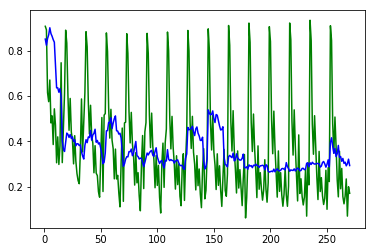

Epoch: 0/20 Iteration: 50 Train loss: 0.901
Epoch: 0/20 Iteration: 100 Train loss: 0.795
Epoch: 0/20 Iteration: 150 Train loss: 0.589
Epoch: 0/20 Iteration: 200 Train loss: 0.573
Epoch: 0/20 Iteration: 250 Train loss: 0.701
Epoch: 0/20 Iteration: 300 Train loss: 0.497
Epoch: 0/20 Iteration: 350 Train loss: 0.505
Epoch: 0/20 Iteration: 400 Train loss: 0.446
Epoch: 0/20 Iteration: 450 Train loss: 0.503
Epoch: 0/20 Iteration: 500 Train loss: 0.453
Val acc: 0.68028
Train accuracy: 0.70630
Test accuracy: 0.67920
Epoch: 0/20 Iteration: 550 Train loss: 0.342
Epoch: 0/20 Iteration: 600 Train loss: 0.483
Epoch: 0/20 Iteration: 650 Train loss: 0.288
Epoch: 0/20 Iteration: 700 Train loss: 0.373
Epoch: 0/20 Iteration: 750 Train loss: 0.651
Epoch: 0/20 Iteration: 800 Train loss: 0.246
Epoch: 0/20 Iteration: 850 Train loss: 0.647
Epoch: 0/20 Iteration: 900 Train loss: 0.531
Epoch: 1/20 Iteration: 50 Train loss: 0.895
Epoch: 1/20 Iteration: 100 Train loss: 0.823
Epoch: 1/20 Iteration: 150 Train loss:

Epoch: 9/20 Iteration: 450 Train loss: 0.327
Epoch: 9/20 Iteration: 500 Train loss: 0.184
Val acc: 0.86424
Train accuracy: 0.86033
Test accuracy: 0.86322
Epoch: 9/20 Iteration: 550 Train loss: 0.231
Epoch: 9/20 Iteration: 600 Train loss: 0.100
Epoch: 9/20 Iteration: 650 Train loss: 0.066
Epoch: 9/20 Iteration: 700 Train loss: 0.169
Epoch: 9/20 Iteration: 750 Train loss: 0.365
Epoch: 9/20 Iteration: 800 Train loss: 0.020
Epoch: 9/20 Iteration: 850 Train loss: 0.460
Epoch: 9/20 Iteration: 900 Train loss: 0.354
Epoch: 10/20 Iteration: 50 Train loss: 0.913
Epoch: 10/20 Iteration: 100 Train loss: 0.817
Epoch: 10/20 Iteration: 150 Train loss: 0.546
Epoch: 10/20 Iteration: 200 Train loss: 0.366
Epoch: 10/20 Iteration: 250 Train loss: 0.427
Epoch: 10/20 Iteration: 300 Train loss: 0.365
Epoch: 10/20 Iteration: 350 Train loss: 0.259
Epoch: 10/20 Iteration: 400 Train loss: 0.155
Epoch: 10/20 Iteration: 450 Train loss: 0.323
Epoch: 10/20 Iteration: 500 Train loss: 0.188
Val acc: 0.86685
Train accu

Epoch: 18/20 Iteration: 600 Train loss: 0.143
Epoch: 18/20 Iteration: 650 Train loss: 0.105
Epoch: 18/20 Iteration: 700 Train loss: 0.126
Epoch: 18/20 Iteration: 750 Train loss: 0.285
Epoch: 18/20 Iteration: 800 Train loss: 0.011
Epoch: 18/20 Iteration: 850 Train loss: 0.195
Epoch: 18/20 Iteration: 900 Train loss: 0.307
Epoch: 19/20 Iteration: 50 Train loss: 0.925
Epoch: 19/20 Iteration: 100 Train loss: 0.789
Epoch: 19/20 Iteration: 150 Train loss: 0.428
Epoch: 19/20 Iteration: 200 Train loss: 0.321
Epoch: 19/20 Iteration: 250 Train loss: 0.380
Epoch: 19/20 Iteration: 300 Train loss: 0.297
Epoch: 19/20 Iteration: 350 Train loss: 0.201
Epoch: 19/20 Iteration: 400 Train loss: 0.155
Epoch: 19/20 Iteration: 450 Train loss: 0.293
Epoch: 19/20 Iteration: 500 Train loss: 0.124
Val acc: 0.89052
Train accuracy: 0.88733
Test accuracy: 0.88781
Epoch: 19/20 Iteration: 550 Train loss: 0.224
Epoch: 19/20 Iteration: 600 Train loss: 0.178
Epoch: 19/20 Iteration: 650 Train loss: 0.127
Epoch: 19/20 Iter

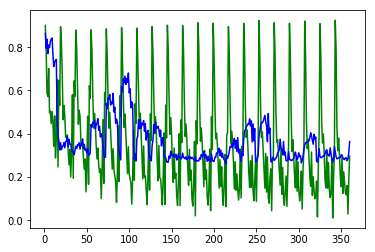

Epoch: 0/10 Iteration: 50 Train loss: 0.716
Epoch: 0/10 Iteration: 100 Train loss: 0.536
Epoch: 0/10 Iteration: 150 Train loss: 0.624
Epoch: 0/10 Iteration: 200 Train loss: 0.494
Epoch: 0/10 Iteration: 250 Train loss: 0.422
Epoch: 0/10 Iteration: 300 Train loss: 0.380
Epoch: 0/10 Iteration: 350 Train loss: 0.373
Epoch: 0/10 Iteration: 400 Train loss: 0.303
Epoch: 0/10 Iteration: 450 Train loss: 0.453
Epoch: 1/10 Iteration: 50 Train loss: 0.689
Epoch: 1/10 Iteration: 100 Train loss: 0.387
Epoch: 1/10 Iteration: 150 Train loss: 0.507
Epoch: 1/10 Iteration: 200 Train loss: 0.393
Epoch: 1/10 Iteration: 250 Train loss: 0.305
Epoch: 1/10 Iteration: 300 Train loss: 0.299
Epoch: 1/10 Iteration: 350 Train loss: 0.307
Epoch: 1/10 Iteration: 400 Train loss: 0.196
Epoch: 1/10 Iteration: 450 Train loss: 0.420
Epoch: 2/10 Iteration: 50 Train loss: 0.698
Epoch: 2/10 Iteration: 100 Train loss: 0.370
Epoch: 2/10 Iteration: 150 Train loss: 0.468
Epoch: 2/10 Iteration: 200 Train loss: 0.365
Epoch: 2/10 I

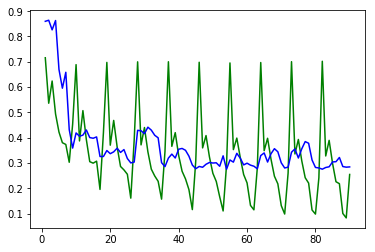

Epoch: 0/15 Iteration: 50 Train loss: 0.698
Epoch: 0/15 Iteration: 100 Train loss: 0.526
Epoch: 0/15 Iteration: 150 Train loss: 0.605
Epoch: 0/15 Iteration: 200 Train loss: 0.440
Epoch: 0/15 Iteration: 250 Train loss: 0.423
Epoch: 0/15 Iteration: 300 Train loss: 0.417
Epoch: 0/15 Iteration: 350 Train loss: 0.357
Epoch: 0/15 Iteration: 400 Train loss: 0.297
Epoch: 0/15 Iteration: 450 Train loss: 0.436
Epoch: 1/15 Iteration: 50 Train loss: 0.714
Epoch: 1/15 Iteration: 100 Train loss: 0.395
Epoch: 1/15 Iteration: 150 Train loss: 0.490
Epoch: 1/15 Iteration: 200 Train loss: 0.347
Epoch: 1/15 Iteration: 250 Train loss: 0.297
Epoch: 1/15 Iteration: 300 Train loss: 0.329
Epoch: 1/15 Iteration: 350 Train loss: 0.297
Epoch: 1/15 Iteration: 400 Train loss: 0.213
Epoch: 1/15 Iteration: 450 Train loss: 0.379
Epoch: 2/15 Iteration: 50 Train loss: 0.708
Epoch: 2/15 Iteration: 100 Train loss: 0.376
Epoch: 2/15 Iteration: 150 Train loss: 0.465
Epoch: 2/15 Iteration: 200 Train loss: 0.337
Epoch: 2/15 I

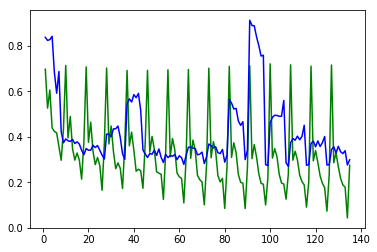

Epoch: 0/20 Iteration: 50 Train loss: 0.681
Epoch: 0/20 Iteration: 100 Train loss: 0.545
Epoch: 0/20 Iteration: 150 Train loss: 0.577
Epoch: 0/20 Iteration: 200 Train loss: 0.409
Epoch: 0/20 Iteration: 250 Train loss: 0.404
Epoch: 0/20 Iteration: 300 Train loss: 0.407
Epoch: 0/20 Iteration: 350 Train loss: 0.384
Epoch: 0/20 Iteration: 400 Train loss: 0.256
Epoch: 0/20 Iteration: 450 Train loss: 0.421
Epoch: 1/20 Iteration: 50 Train loss: 0.687
Epoch: 1/20 Iteration: 100 Train loss: 0.378
Epoch: 1/20 Iteration: 150 Train loss: 0.509
Epoch: 1/20 Iteration: 200 Train loss: 0.355
Epoch: 1/20 Iteration: 250 Train loss: 0.318
Epoch: 1/20 Iteration: 300 Train loss: 0.337
Epoch: 1/20 Iteration: 350 Train loss: 0.287
Epoch: 1/20 Iteration: 400 Train loss: 0.186
Epoch: 1/20 Iteration: 450 Train loss: 0.385
Epoch: 2/20 Iteration: 50 Train loss: 0.686
Epoch: 2/20 Iteration: 100 Train loss: 0.336
Epoch: 2/20 Iteration: 150 Train loss: 0.492
Epoch: 2/20 Iteration: 200 Train loss: 0.342
Epoch: 2/20 I

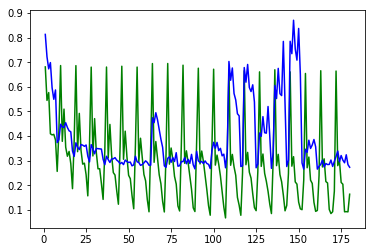

Epoch: 0/10 Iteration: 50 Train loss: 0.717
Epoch: 0/10 Iteration: 100 Train loss: 1.028
Epoch: 0/10 Iteration: 150 Train loss: 0.747
Epoch: 0/10 Iteration: 200 Train loss: 0.466
Epoch: 0/10 Iteration: 250 Train loss: 0.838
Epoch: 0/10 Iteration: 300 Train loss: 0.496
Epoch: 0/10 Iteration: 350 Train loss: 0.513
Epoch: 0/10 Iteration: 400 Train loss: 0.409
Epoch: 0/10 Iteration: 450 Train loss: 0.319
Epoch: 0/10 Iteration: 500 Train loss: 0.676
Val acc: 0.66714
Train accuracy: 0.63847
Test accuracy: 0.66326
Epoch: 0/10 Iteration: 550 Train loss: 0.327
Epoch: 0/10 Iteration: 600 Train loss: 0.432
Epoch: 0/10 Iteration: 650 Train loss: 0.450
Epoch: 0/10 Iteration: 700 Train loss: 0.351
Epoch: 0/10 Iteration: 750 Train loss: 0.303
Epoch: 0/10 Iteration: 800 Train loss: 0.372
Epoch: 0/10 Iteration: 850 Train loss: 0.246
Epoch: 0/10 Iteration: 900 Train loss: 0.495
Epoch: 0/10 Iteration: 950 Train loss: 0.477
Epoch: 0/10 Iteration: 1000 Train loss: 0.477
Val acc: 0.48046
Train accuracy: 0.6

Epoch: 4/10 Iteration: 1000 Train loss: 0.369
Val acc: 0.83838
Train accuracy: 0.83910
Test accuracy: 0.83275
Epoch: 4/10 Iteration: 1050 Train loss: 0.507
Epoch: 4/10 Iteration: 1100 Train loss: 0.131
Epoch: 4/10 Iteration: 1150 Train loss: 0.238
Epoch: 4/10 Iteration: 1200 Train loss: 0.349
Epoch: 4/10 Iteration: 1250 Train loss: 0.005
Epoch: 4/10 Iteration: 1300 Train loss: 0.174
Epoch: 4/10 Iteration: 1350 Train loss: 0.162
Epoch: 4/10 Iteration: 1400 Train loss: 0.115
Epoch: 4/10 Iteration: 1450 Train loss: 0.223
Epoch: 4/10 Iteration: 1500 Train loss: 0.172
Val acc: 0.84876
Train accuracy: 0.84902
Test accuracy: 0.84477
Epoch: 4/10 Iteration: 1550 Train loss: 0.339
Epoch: 4/10 Iteration: 1600 Train loss: 0.073
Epoch: 4/10 Iteration: 1650 Train loss: 0.197
Epoch: 4/10 Iteration: 1700 Train loss: 0.478
Epoch: 4/10 Iteration: 1750 Train loss: 0.019
Epoch: 4/10 Iteration: 1800 Train loss: 0.335
Epoch: 5/10 Iteration: 50 Train loss: 0.638
Epoch: 5/10 Iteration: 100 Train loss: 1.110
E

Epoch: 9/10 Iteration: 50 Train loss: 0.655
Epoch: 9/10 Iteration: 100 Train loss: 1.086
Epoch: 9/10 Iteration: 150 Train loss: 0.797
Epoch: 9/10 Iteration: 200 Train loss: 0.511
Epoch: 9/10 Iteration: 250 Train loss: 0.659
Epoch: 9/10 Iteration: 300 Train loss: 0.293
Epoch: 9/10 Iteration: 350 Train loss: 0.382
Epoch: 9/10 Iteration: 400 Train loss: 0.192
Epoch: 9/10 Iteration: 450 Train loss: 0.058
Epoch: 9/10 Iteration: 500 Train loss: 0.406
Val acc: 0.85664
Train accuracy: 0.86607
Test accuracy: 0.85449
Epoch: 9/10 Iteration: 550 Train loss: 0.245
Epoch: 9/10 Iteration: 600 Train loss: 0.077
Epoch: 9/10 Iteration: 650 Train loss: 0.018
Epoch: 9/10 Iteration: 700 Train loss: 0.161
Epoch: 9/10 Iteration: 750 Train loss: 0.130
Epoch: 9/10 Iteration: 800 Train loss: 0.026
Epoch: 9/10 Iteration: 850 Train loss: 0.031
Epoch: 9/10 Iteration: 900 Train loss: 0.370
Epoch: 9/10 Iteration: 950 Train loss: 0.225
Epoch: 9/10 Iteration: 1000 Train loss: 0.274
Val acc: 0.87526
Train accuracy: 0.8

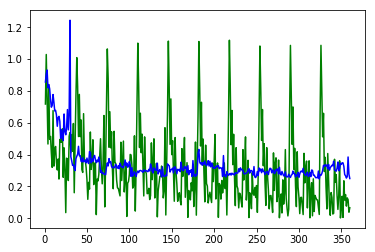

Epoch: 0/15 Iteration: 50 Train loss: 0.753
Epoch: 0/15 Iteration: 100 Train loss: 1.046
Epoch: 0/15 Iteration: 150 Train loss: 0.741
Epoch: 0/15 Iteration: 200 Train loss: 0.469
Epoch: 0/15 Iteration: 250 Train loss: 0.841
Epoch: 0/15 Iteration: 300 Train loss: 0.436
Epoch: 0/15 Iteration: 350 Train loss: 0.547
Epoch: 0/15 Iteration: 400 Train loss: 0.412
Epoch: 0/15 Iteration: 450 Train loss: 0.321
Epoch: 0/15 Iteration: 500 Train loss: 0.721
Val acc: 0.67804
Train accuracy: 0.63743
Test accuracy: 0.67512
Epoch: 0/15 Iteration: 550 Train loss: 0.357
Epoch: 0/15 Iteration: 600 Train loss: 0.442
Epoch: 0/15 Iteration: 650 Train loss: 0.439
Epoch: 0/15 Iteration: 700 Train loss: 0.354
Epoch: 0/15 Iteration: 750 Train loss: 0.332
Epoch: 0/15 Iteration: 800 Train loss: 0.380
Epoch: 0/15 Iteration: 850 Train loss: 0.179
Epoch: 0/15 Iteration: 900 Train loss: 0.564
Epoch: 0/15 Iteration: 950 Train loss: 0.445
Epoch: 0/15 Iteration: 1000 Train loss: 0.485
Val acc: 0.68755
Train accuracy: 0.7

Epoch: 4/15 Iteration: 1000 Train loss: 0.352
Val acc: 0.84170
Train accuracy: 0.85137
Test accuracy: 0.84135
Epoch: 4/15 Iteration: 1050 Train loss: 0.404
Epoch: 4/15 Iteration: 1100 Train loss: 0.168
Epoch: 4/15 Iteration: 1150 Train loss: 0.221
Epoch: 4/15 Iteration: 1200 Train loss: 0.273
Epoch: 4/15 Iteration: 1250 Train loss: 0.002
Epoch: 4/15 Iteration: 1300 Train loss: 0.151
Epoch: 4/15 Iteration: 1350 Train loss: 0.141
Epoch: 4/15 Iteration: 1400 Train loss: 0.167
Epoch: 4/15 Iteration: 1450 Train loss: 0.112
Epoch: 4/15 Iteration: 1500 Train loss: 0.456
Val acc: 0.86810
Train accuracy: 0.85512
Test accuracy: 0.86273
Epoch: 4/15 Iteration: 1550 Train loss: 0.278
Epoch: 4/15 Iteration: 1600 Train loss: 0.008
Epoch: 4/15 Iteration: 1650 Train loss: 0.053
Epoch: 4/15 Iteration: 1700 Train loss: 0.576
Epoch: 4/15 Iteration: 1750 Train loss: 0.022
Epoch: 4/15 Iteration: 1800 Train loss: 0.175
Epoch: 5/15 Iteration: 50 Train loss: 0.644
Epoch: 5/15 Iteration: 100 Train loss: 1.096
E

Epoch: 9/15 Iteration: 50 Train loss: 0.648
Epoch: 9/15 Iteration: 100 Train loss: 1.137
Epoch: 9/15 Iteration: 150 Train loss: 0.723
Epoch: 9/15 Iteration: 200 Train loss: 0.511
Epoch: 9/15 Iteration: 250 Train loss: 0.435
Epoch: 9/15 Iteration: 300 Train loss: 0.176
Epoch: 9/15 Iteration: 350 Train loss: 0.471
Epoch: 9/15 Iteration: 400 Train loss: 0.473
Epoch: 9/15 Iteration: 450 Train loss: 0.057
Epoch: 9/15 Iteration: 500 Train loss: 0.414
Val acc: 0.87817
Train accuracy: 0.87681
Test accuracy: 0.87280
Epoch: 9/15 Iteration: 550 Train loss: 0.127
Epoch: 9/15 Iteration: 600 Train loss: 0.097
Epoch: 9/15 Iteration: 650 Train loss: 0.022
Epoch: 9/15 Iteration: 700 Train loss: 0.222
Epoch: 9/15 Iteration: 750 Train loss: 0.098
Epoch: 9/15 Iteration: 800 Train loss: 0.086
Epoch: 9/15 Iteration: 850 Train loss: 0.056
Epoch: 9/15 Iteration: 900 Train loss: 0.277
Epoch: 9/15 Iteration: 950 Train loss: 0.355
Epoch: 9/15 Iteration: 1000 Train loss: 0.247
Val acc: 0.88809
Train accuracy: 0.8

Epoch: 13/15 Iteration: 850 Train loss: 0.010
Epoch: 13/15 Iteration: 900 Train loss: 0.262
Epoch: 13/15 Iteration: 950 Train loss: 0.359
Epoch: 13/15 Iteration: 1000 Train loss: 0.242
Val acc: 0.89750
Train accuracy: 0.90739
Test accuracy: 0.89326
Epoch: 13/15 Iteration: 1050 Train loss: 0.120
Epoch: 13/15 Iteration: 1100 Train loss: 0.141
Epoch: 13/15 Iteration: 1150 Train loss: 0.142
Epoch: 13/15 Iteration: 1200 Train loss: 0.173
Epoch: 13/15 Iteration: 1250 Train loss: 0.001
Epoch: 13/15 Iteration: 1300 Train loss: 0.126
Epoch: 13/15 Iteration: 1350 Train loss: 0.124
Epoch: 13/15 Iteration: 1400 Train loss: 0.125
Epoch: 13/15 Iteration: 1450 Train loss: 0.051
Epoch: 13/15 Iteration: 1500 Train loss: 0.020
Val acc: 0.89029
Train accuracy: 0.91068
Test accuracy: 0.88681
Epoch: 13/15 Iteration: 1550 Train loss: 0.144
Epoch: 13/15 Iteration: 1600 Train loss: 0.232
Epoch: 13/15 Iteration: 1650 Train loss: 0.004
Epoch: 13/15 Iteration: 1700 Train loss: 0.312
Epoch: 13/15 Iteration: 1750 

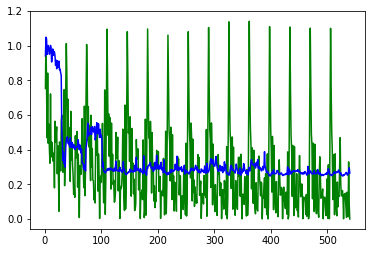

Epoch: 0/20 Iteration: 50 Train loss: 0.725
Epoch: 0/20 Iteration: 100 Train loss: 1.040
Epoch: 0/20 Iteration: 150 Train loss: 0.743
Epoch: 0/20 Iteration: 200 Train loss: 0.429
Epoch: 0/20 Iteration: 250 Train loss: 0.797
Epoch: 0/20 Iteration: 300 Train loss: 0.470
Epoch: 0/20 Iteration: 350 Train loss: 0.544
Epoch: 0/20 Iteration: 400 Train loss: 0.389
Epoch: 0/20 Iteration: 450 Train loss: 0.321
Epoch: 0/20 Iteration: 500 Train loss: 0.655
Val acc: 0.68039
Train accuracy: 0.64396
Test accuracy: 0.67773
Epoch: 0/20 Iteration: 550 Train loss: 0.299
Epoch: 0/20 Iteration: 600 Train loss: 0.459
Epoch: 0/20 Iteration: 650 Train loss: 0.457
Epoch: 0/20 Iteration: 700 Train loss: 0.418
Epoch: 0/20 Iteration: 750 Train loss: 0.392
Epoch: 0/20 Iteration: 800 Train loss: 0.447
Epoch: 0/20 Iteration: 850 Train loss: 0.258
Epoch: 0/20 Iteration: 900 Train loss: 0.554
Epoch: 0/20 Iteration: 950 Train loss: 0.406
Epoch: 0/20 Iteration: 1000 Train loss: 0.542
Val acc: 0.50660
Train accuracy: 0.6

Epoch: 4/20 Iteration: 1000 Train loss: 0.343
Val acc: 0.85730
Train accuracy: 0.85127
Test accuracy: 0.85649
Epoch: 4/20 Iteration: 1050 Train loss: 0.332
Epoch: 4/20 Iteration: 1100 Train loss: 0.160
Epoch: 4/20 Iteration: 1150 Train loss: 0.247
Epoch: 4/20 Iteration: 1200 Train loss: 0.256
Epoch: 4/20 Iteration: 1250 Train loss: 0.008
Epoch: 4/20 Iteration: 1300 Train loss: 0.144
Epoch: 4/20 Iteration: 1350 Train loss: 0.156
Epoch: 4/20 Iteration: 1400 Train loss: 0.166
Epoch: 4/20 Iteration: 1450 Train loss: 0.119
Epoch: 4/20 Iteration: 1500 Train loss: 0.428
Val acc: 0.87326
Train accuracy: 0.85611
Test accuracy: 0.87260
Epoch: 4/20 Iteration: 1550 Train loss: 0.409
Epoch: 4/20 Iteration: 1600 Train loss: 0.016
Epoch: 4/20 Iteration: 1650 Train loss: 0.074
Epoch: 4/20 Iteration: 1700 Train loss: 0.518
Epoch: 4/20 Iteration: 1750 Train loss: 0.022
Epoch: 4/20 Iteration: 1800 Train loss: 0.268
Epoch: 5/20 Iteration: 50 Train loss: 0.615
Epoch: 5/20 Iteration: 100 Train loss: 1.154
E

Epoch: 9/20 Iteration: 50 Train loss: 0.604
Epoch: 9/20 Iteration: 100 Train loss: 1.161
Epoch: 9/20 Iteration: 150 Train loss: 0.822
Epoch: 9/20 Iteration: 200 Train loss: 0.484
Epoch: 9/20 Iteration: 250 Train loss: 0.750
Epoch: 9/20 Iteration: 300 Train loss: 0.301
Epoch: 9/20 Iteration: 350 Train loss: 0.460
Epoch: 9/20 Iteration: 400 Train loss: 0.408
Epoch: 9/20 Iteration: 450 Train loss: 0.049
Epoch: 9/20 Iteration: 500 Train loss: 0.374
Val acc: 0.87014
Train accuracy: 0.86269
Test accuracy: 0.86467
Epoch: 9/20 Iteration: 550 Train loss: 0.051
Epoch: 9/20 Iteration: 600 Train loss: 0.104
Epoch: 9/20 Iteration: 650 Train loss: 0.097
Epoch: 9/20 Iteration: 700 Train loss: 0.130
Epoch: 9/20 Iteration: 750 Train loss: 0.066
Epoch: 9/20 Iteration: 800 Train loss: 0.039
Epoch: 9/20 Iteration: 850 Train loss: 0.036
Epoch: 9/20 Iteration: 900 Train loss: 0.303
Epoch: 9/20 Iteration: 950 Train loss: 0.093
Epoch: 9/20 Iteration: 1000 Train loss: 0.264
Val acc: 0.88001
Train accuracy: 0.8

Epoch: 13/20 Iteration: 850 Train loss: 0.008
Epoch: 13/20 Iteration: 900 Train loss: 0.295
Epoch: 13/20 Iteration: 950 Train loss: 0.135
Epoch: 13/20 Iteration: 1000 Train loss: 0.290
Val acc: 0.90001
Train accuracy: 0.90971
Test accuracy: 0.89914
Epoch: 13/20 Iteration: 1050 Train loss: 0.245
Epoch: 13/20 Iteration: 1100 Train loss: 0.220
Epoch: 13/20 Iteration: 1150 Train loss: 0.182
Epoch: 13/20 Iteration: 1200 Train loss: 0.253
Epoch: 13/20 Iteration: 1250 Train loss: 0.001
Epoch: 13/20 Iteration: 1300 Train loss: 0.126
Epoch: 13/20 Iteration: 1350 Train loss: 0.124
Epoch: 13/20 Iteration: 1400 Train loss: 0.008
Epoch: 13/20 Iteration: 1450 Train loss: 0.050
Epoch: 13/20 Iteration: 1500 Train loss: 0.110
Val acc: 0.90185
Train accuracy: 0.91007
Test accuracy: 0.90027
Epoch: 13/20 Iteration: 1550 Train loss: 0.126
Epoch: 13/20 Iteration: 1600 Train loss: 0.069
Epoch: 13/20 Iteration: 1650 Train loss: 0.023
Epoch: 13/20 Iteration: 1700 Train loss: 0.160
Epoch: 13/20 Iteration: 1750 

Test accuracy: 0.90328
Epoch: 17/20 Iteration: 1550 Train loss: 0.153
Epoch: 17/20 Iteration: 1600 Train loss: 0.061
Epoch: 17/20 Iteration: 1650 Train loss: 0.004
Epoch: 17/20 Iteration: 1700 Train loss: 0.219
Epoch: 17/20 Iteration: 1750 Train loss: 0.002
Epoch: 17/20 Iteration: 1800 Train loss: 0.015
Epoch: 18/20 Iteration: 50 Train loss: 0.560
Epoch: 18/20 Iteration: 100 Train loss: 1.157
Epoch: 18/20 Iteration: 150 Train loss: 0.750
Epoch: 18/20 Iteration: 200 Train loss: 0.602
Epoch: 18/20 Iteration: 250 Train loss: 0.627
Epoch: 18/20 Iteration: 300 Train loss: 0.108
Epoch: 18/20 Iteration: 350 Train loss: 0.336
Epoch: 18/20 Iteration: 400 Train loss: 0.287
Epoch: 18/20 Iteration: 450 Train loss: 0.032
Epoch: 18/20 Iteration: 500 Train loss: 0.342
Val acc: 0.90180
Train accuracy: 0.90351
Test accuracy: 0.89837
Epoch: 18/20 Iteration: 550 Train loss: 0.098
Epoch: 18/20 Iteration: 600 Train loss: 0.027
Epoch: 18/20 Iteration: 650 Train loss: 0.142
Epoch: 18/20 Iteration: 700 Train 

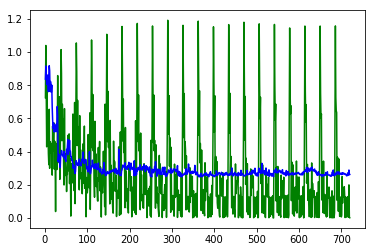

Epoch: 0/10 Iteration: 50 Train loss: 0.904
Epoch: 0/10 Iteration: 100 Train loss: 0.865
Epoch: 0/10 Iteration: 150 Train loss: 0.589
Epoch: 0/10 Iteration: 200 Train loss: 0.510
Epoch: 0/10 Iteration: 250 Train loss: 0.662
Epoch: 0/10 Iteration: 300 Train loss: 0.482
Epoch: 0/10 Iteration: 350 Train loss: 0.447
Epoch: 0/10 Iteration: 400 Train loss: 0.393
Epoch: 0/10 Iteration: 450 Train loss: 0.586
Epoch: 0/10 Iteration: 500 Train loss: 0.369
Val acc: 0.64237
Train accuracy: 0.70147
Test accuracy: 0.63981
Epoch: 0/10 Iteration: 550 Train loss: 0.362
Epoch: 0/10 Iteration: 600 Train loss: 0.325
Epoch: 0/10 Iteration: 650 Train loss: 0.253
Epoch: 0/10 Iteration: 700 Train loss: 0.337
Epoch: 0/10 Iteration: 750 Train loss: 0.786
Epoch: 0/10 Iteration: 800 Train loss: 0.286
Epoch: 0/10 Iteration: 850 Train loss: 0.530
Epoch: 0/10 Iteration: 900 Train loss: 0.529
Epoch: 1/10 Iteration: 50 Train loss: 0.896
Epoch: 1/10 Iteration: 100 Train loss: 0.765
Epoch: 1/10 Iteration: 150 Train loss:

Epoch: 9/10 Iteration: 450 Train loss: 0.289
Epoch: 9/10 Iteration: 500 Train loss: 0.130
Val acc: 0.87633
Train accuracy: 0.88063
Test accuracy: 0.87244
Epoch: 9/10 Iteration: 550 Train loss: 0.176
Epoch: 9/10 Iteration: 600 Train loss: 0.138
Epoch: 9/10 Iteration: 650 Train loss: 0.117
Epoch: 9/10 Iteration: 700 Train loss: 0.187
Epoch: 9/10 Iteration: 750 Train loss: 0.251
Epoch: 9/10 Iteration: 800 Train loss: 0.091
Epoch: 9/10 Iteration: 850 Train loss: 0.220
Epoch: 9/10 Iteration: 900 Train loss: 0.131
Training Completed
Test accuracy: 0.90174


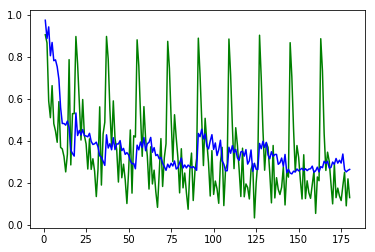

In [5]:
iter_ = i
for hyperameter_tuple in all_hyperpara_list: 
    #Write To File
    import csv
    def file_writer(file_name,row_):
        with open(file_name, 'a') as f:
            spamwriter = csv.writer(f, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
            spamwriter.writerow(row_ )

    #Hyperparmeters
    lstm_size = hyperameter_tuple[0]
    lstm_layers = hyperameter_tuple[1]
    batch_size = hyperameter_tuple[2]
    n_epochs = hyperameter_tuple[3]
    file_writer('hyper_'+str(iter_)+'.csv',['lstm_size= '+str(lstm_size), 'lstm_layers= '+str(lstm_layers),'batch_size= '+str(batch_size),'n_epochs= '+str(n_epochs)])    

    #Reset Graph
    from tensorflow.python.framework import ops
    ops.reset_default_graph()

    #Placeholder
    X = tf.placeholder(tf.float32, [None, None, 300], name = 'inputs')
    Y = tf.placeholder(tf.float32, [None, 1], name = 'labels')
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')

    #Build Network
    lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)
    cell = tf.contrib.rnn.MultiRNNCell([lstm]*lstm_layers)
    initial_state = cell.zero_state(batch_size, tf.float32)
    outputs, final_state = tf.nn.dynamic_rnn(cell, X, initial_state = initial_state)
    predictions = tf.contrib.layers.fully_connected(outputs[:, -1],1, activation_fn=tf.tanh)

    #Optimisation
    loss = tf.reduce_mean(tf.square(Y - predictions))
    optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)

    #Accuracy
    correct_pred = tf.equal(tf.cast(tf.round(predictions), tf.float32), Y)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    #Return Batch
    def get_batches(x, y, batch_size=100):
        n_batches = len(x)//batch_size
        x, y = x[:n_batches*batch_size], y[:n_batches*batch_size]
        for ii in range(0, len(x), batch_size):
            yield x[ii:ii+batch_size], y[ii:ii+batch_size]

    #Start Time
    import time
    start_time = time.time()

    #Temp Variables
    x_ = [] #Accounts for batch size
    count = 0
    train_loss = []
    val_loss = []

    #START SESSION:
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    for e in range(n_epochs):
        state = sess.run(initial_state)
        iteration = 1

        for ii, (x, y) in enumerate(get_batches(train_x, train_y, batch_size), 1):
            feed = {X: x, Y: np.reshape(y,(len(y),1)), initial_state: state}
            state, loss_,  _ = sess.run([final_state, loss, optimizer], feed_dict=feed)

            if iteration%50==0:
                #Train Loss:
                print("Epoch: {}/{}".format(e, n_epochs),"Iteration: {}".format(iteration),"Train loss: {:.3f}".format(loss_))
                train_loss.append(loss_)
                count = count + 1
                x_.append(count)

                #Validation loss:
                temp_val_loss = []
                val_state = sess.run(cell.zero_state(batch_size, tf.float32))
                for x, y in get_batches(val_x, val_y, batch_size):
                    feed = {X: x,Y: np.reshape(y,(len(y),1)),initial_state: val_state}
                    loss_, val_state = sess.run([loss, final_state], feed_dict=feed)
                    temp_val_loss.append(loss_)
                val_loss.append(np.mean(temp_val_loss))

            if iteration%500==0:
                #Validation Acc:
                val_acc = []
                val_state = sess.run(cell.zero_state(batch_size, tf.float32))
                for x, y in get_batches(val_x, val_y, batch_size):
                    feed = {X: x,Y: np.reshape(y,(len(y),1)),initial_state: val_state}

                    batch_acc, val_state = sess.run([accuracy, final_state], feed_dict=feed)
                    val_acc.append(batch_acc)
                print("Val acc: {:.5f}".format(np.mean(val_acc)))
                file_writer('hyper_'+str(iter_)+'.csv',['Epoch= '+str(e),'Validation Acc= '+str(np.mean(val_acc)) ])

                #Train Acc:
                train_acc = []
                train_state = sess.run(cell.zero_state(batch_size, tf.float32))
                for ii, (x, y) in enumerate(get_batches(train_x, train_y, batch_size), 1):
                    feed = {X: x,Y:  np.reshape(y,(len(y),1)),initial_state: train_state}

                    batch_acc, train_state = sess.run([accuracy, final_state], feed_dict=feed)
                    train_acc.append(batch_acc)
                print("Train accuracy: {:.5f}".format(np.mean(train_acc)))
                file_writer('hyper_'+str(iter_)+'.csv',['Epoch= '+str(e),'Train Acc= '+str(np.mean(train_acc)) ])

                #Test Acc: 
                test_acc = []
                test_state = sess.run(cell.zero_state(batch_size, tf.float32))
                for ii, (x, y) in enumerate(get_batches(test_x, test_y, batch_size), 1):
                    feed = {X: x,Y: np.reshape(y,(len(y),1)),initial_state: test_state}

                    batch_acc, test_state = sess.run([accuracy, final_state], feed_dict=feed)
                    test_acc.append(batch_acc)
                print("Test accuracy: {:.5f}".format(np.mean(test_acc)))
                file_writer('hyper_'+str(iter_)+'.csv',['Epoch= '+str(e),'Test Acc= '+str(np.mean(test_acc)) ])

            #iteration represents batch index
            iteration +=1

    print('Training Completed')

    #Test Acc(after complete training): 
    test_acc = []
    test_state = sess.run(cell.zero_state(batch_size, tf.float32))
    for ii, (x, y) in enumerate(get_batches(test_x, test_y, batch_size), 1):
        feed = {X: x,Y: np.reshape(y,(len(y),1)),initial_state: test_state}

        batch_acc, test_state = sess.run([accuracy, final_state], feed_dict=feed)
        test_acc.append(batch_acc)
    print("Test accuracy: {:.5f}".format(np.mean(test_acc)))
    file_writer('hyper_'+str(iter_)+'.csv',['Epoch= '+str(e),'Final Test Acc= '+str(np.mean(test_acc)) ])

    #Time:
    time_taken = time.time()-start_time 

    #Graph:
    import matplotlib.pyplot as plt
    plt.plot(x_,train_loss,'g',x_,val_loss,'b')
    plt.savefig("figure"+str(iter_)+".png")
    plt.show()

    #Write Time_Taken, Min_Val_loss
    file_writer('hyper_'+str(iter_)+'.csv',['time_taken= '+str(time_taken),'min val loss= '+str(np.min(val_loss)) ])

    #Hyperparameter S.No.
    iter_+=1